### Importing Libraries and reading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

In [ ]:
# Load the dataset
df = pd.read_csv('/content/employee_data (1) 2.csv')

# Display the first few rows of the dataset
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


### EDA and Visualization

In [ ]:
# Check for missing values
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['filed_complaint','recently_promoted'], axis=1)
df

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,NaN,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...
14244,178,IT,0.735865,5,low,0.263282,Employed,5.0
14245,257,sales,0.638604,3,low,0.868209,Employed,2.0
14246,232,finance,0.847623,5,medium,0.898917,Left,5.0
14247,130,IT,0.757184,4,medium,0.641304,Employed,3.0


In [ ]:
# Impute missing values in the 'last_evaluation' variable with the mean
from statistics import mean
Mean= df['last_evaluation'].mean()
df['last_evaluation'].fillna(value=Mean, inplace=True)
# Calculate mean values for 'tenure' and 'satisfaction'
mean_tenure = df['tenure'].mean()
mean_satisfaction = df['satisfaction'].mean()

# Impute missing values with the mean values
df['tenure'].fillna(value=mean_tenure, inplace=True)
df['satisfaction'].fillna(value=mean_satisfaction, inplace=True)

In [ ]:
df.head()
df.isnull().sum()

avg_monthly_hrs      0
department         709
last_evaluation      0
n_projects           0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

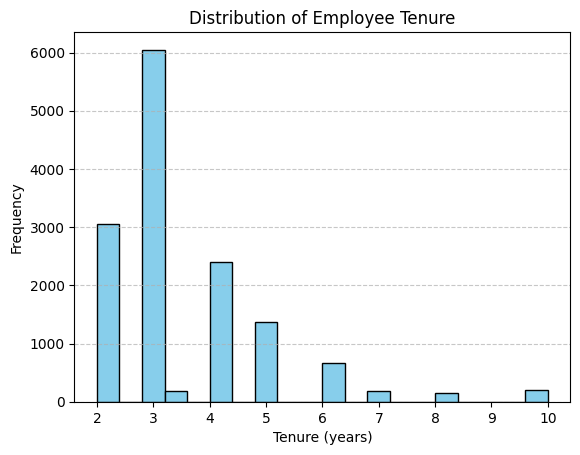

In [ ]:
# Create a histogram to visualize the distribution of employee tenure
plt.hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')  # Set the number of bins and color
plt.xlabel('Tenure (years)')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Distribution of Employee Tenure')  # Title of the histogram
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.show()

The median tenure is 3 years, which means that half of the employees have worked at the company for less than 3 years, and the other half have worked there for longer than 3 years.

The distribution is skewed towards the left, which means that there are more employees with shorter tenures than employees with longer tenures.

The company may have difficulty attracting and retaining top talent, as employees are leaving at a relatively high rate.

The company may have a high training cost, as it is constantly having to train new employees.

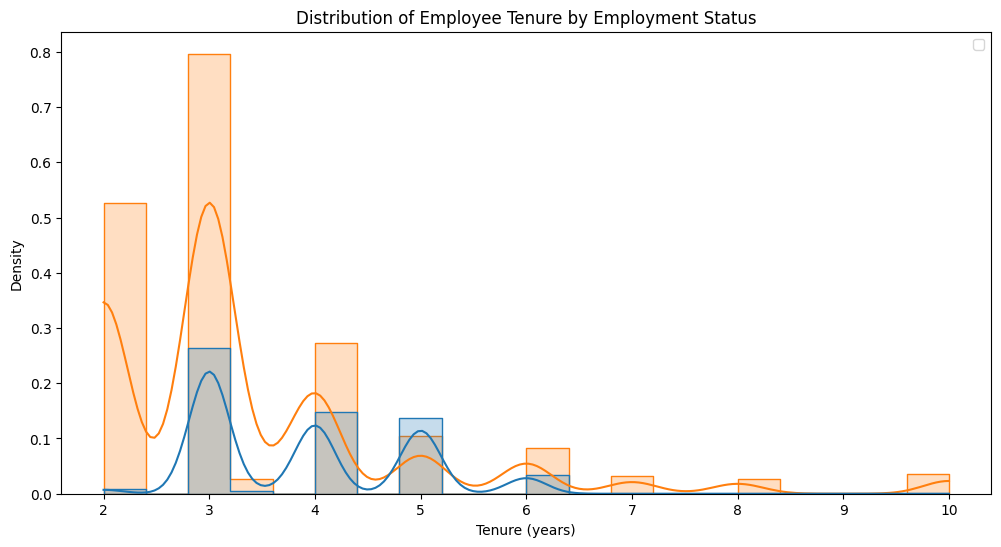

In [ ]:
# Create a KDE plot to visualize the distribution of employee tenure by employment status
plt.figure(figsize=(12, 6))
sns.histplot(df, x='tenure', bins=20, kde=True, hue='status', element='step', stat='density')
plt.title('Distribution of Employee Tenure by Employment Status')
plt.xlabel('Tenure (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

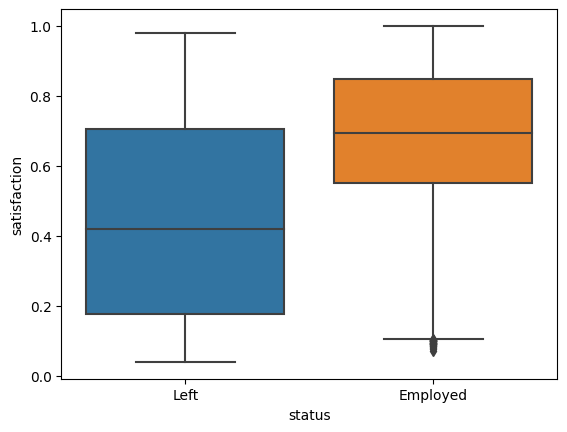

In [ ]:
# Create a boxplot to examine the distribution of job satisfaction scores among employees
sns.boxplot(x='status', y='satisfaction', data=df)
plt.show()

The box plot suggests that employee satisfaction is a key factor in employee retention.

Companies should focus on improving employee satisfaction in order to reduce turnover.

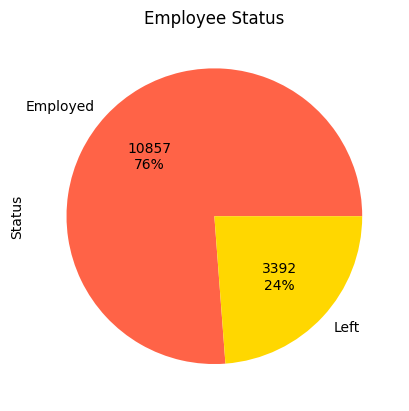

In [ ]:
# Generate a pie chart to show the distribution of attrition
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

status_distribution = df['status'].value_counts()
status_distribution.plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, colors=['tomato', 'gold'])
plt.ylabel('Status')
plt.title("Employee Status")
plt.show()

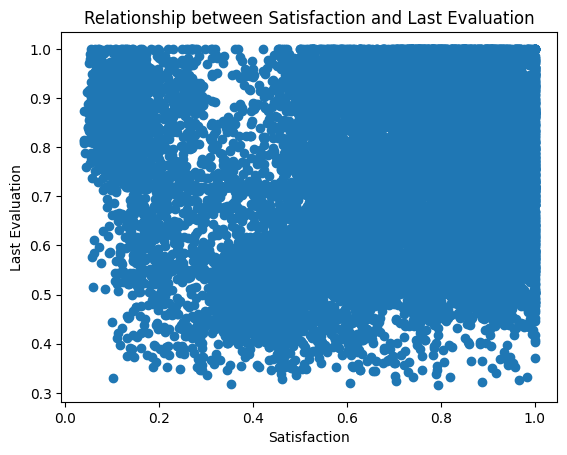

In [ ]:
# Scatter plot to explore the relationship between employee satisfaction scores and last evaluation scores
plt.scatter(df['satisfaction'], df['last_evaluation'])
plt.xlabel('Satisfaction')
plt.ylabel('Last Evaluation')
plt.title('Relationship between Satisfaction and Last Evaluation')
plt.show()

There is a positive correlation between the two variables, which means that employees who are more satisfied with their jobs are also more likely to perform well.

The scatter plot also shows that there is a wide range of satisfaction scores for each level of last evaluation score. This suggests that employee satisfaction is not the only factor that influences employee performance. Other factors, such as employee skills, knowledge, and experience, also play a role.

### Building a classification model

In [ ]:
# Prepare the features (X) and target variable (y)
X = df[['tenure', 'satisfaction', 'n_projects']]
y = df['status']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Experiment with different criteria (Gini impurity and Entropy)
criteria = ['gini', 'entropy']

for criterion in criteria:
    # Create and train a decision tree classifier with the specified criterion
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Decision Tree with Criterion "{criterion}":')
    print(f'Accuracy: {accuracy:.2f}')

    # Generate a classification report
    print(classification_report(y_test, y_pred))

    # Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(confusion)
    print('\n')

Decision Tree with Criterion "gini":
Accuracy: 0.94
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.85      0.88      0.86       661

    accuracy                           0.94      2850
   macro avg       0.91      0.92      0.91      2850
weighted avg       0.94      0.94      0.94      2850

Confusion Matrix:
[[2085  104]
 [  78  583]]


Decision Tree with Criterion "entropy":
Accuracy: 0.93
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.84      0.88      0.86       661

    accuracy                           0.93      2850
   macro avg       0.90      0.92      0.91      2850
weighted avg       0.94      0.93      0.93      2850

Confusion Matrix:
[[2081  108]
 [  79  582]]




Both classifiers achieved a high accuracy of over 90%. However, the classifier trained with the Gini impurity criterion had a slightly higher accuracy of 94% compared to the classifier trained with the entropy criterion, which had an accuracy of 93%.

The confusion matrices for both classifiers show that they were able to correctly identify a large proportion of both employed and left employees. However, the classifier trained with the Gini impurity criterion was able to correctly identify more employed employees than the classifier trained with the entropy criterion.

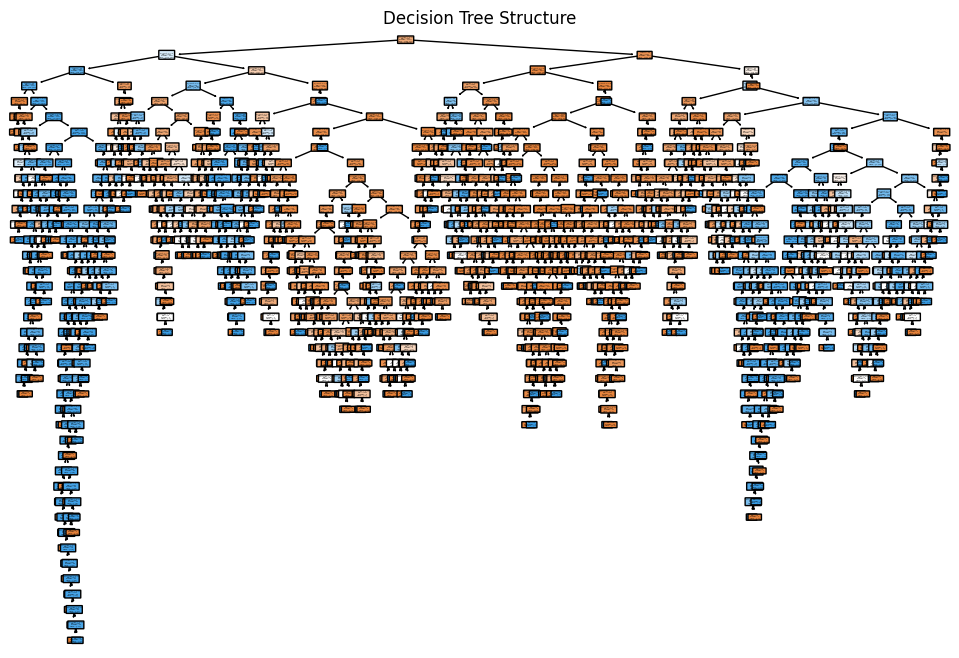

Depth of the Decision Tree: 39
Feature Importances:
tenure: 0.23
satisfaction: 0.59
n_projects: 0.19


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
selected_features = ['tenure', 'satisfaction', 'n_projects']
# Visualize the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=selected_features, class_names=['Employed', 'Left'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

# Determine the depth of the tree
tree_depth = clf.get_depth()
print(f'Depth of the Decision Tree: {tree_depth}')

# Identify the most influential features for predicting attrition
feature_importances = clf.feature_importances_
print('Feature Importances:')
for feature, importance in zip(selected_features, feature_importances):
    print(f'{feature}: {importance:.2f}')


The depth of the decision tree is 39, which means that the tree has 39 levels. This suggests that the tree is relatively complex and that it is considering a large number of factors when making predictions.

The feature importances suggest that satisfaction is the most important feature for predicting employee status, followed by tenure and number of projects worked on. This suggests that companies should focus on improving employee satisfaction in order to reduce turnover.

In [ ]:
# Post Pruning
min_samples_leaf = 10
max_depth = 5

# Create a decision tree classifier with post-pruning
clf_pruned = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

# Train the classifier
clf_pruned.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy with Pruning: {accuracy_pruned:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred_pruned))

Accuracy with Pruning: 0.95
              precision    recall  f1-score   support

    Employed       0.97      0.97      0.97      2189
        Left       0.89      0.91      0.90       661

    accuracy                           0.95      2850
   macro avg       0.93      0.94      0.93      2850
weighted avg       0.95      0.95      0.95      2850



The pruned classifier has an accuracy of 95%, which is slightly higher than the accuracy of the unpruned classifier (94%). The pruned classifier also has higher precision and recall scores for both employed and left employees.

### Model Evaluation

In [ ]:
# Initialize a dictionary to store results for Gini and Entropy criteria
results = {}

# Evaluate for both Gini impurity and entropy criteria
for criterion in criteria:
    # Create a decision tree classifier with post-pruning
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Left')
    recall = recall_score(y_test, y_pred, pos_label='Left')
    f1 = f1_score(y_test, y_pred, pos_label='Left')
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[criterion] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

# Display the results for both criteria
for criterion, metrics in results.items():
    print(f"Metrics for {criterion} criterion:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1-Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")


Metrics for gini criterion:
Accuracy: 0.95
Precision: 0.89
Recall: 0.91
F1-Score: 0.90
Confusion Matrix:
[[2115   74]
 [  60  601]]


Metrics for entropy criterion:
Accuracy: 0.95
Precision: 0.88
Recall: 0.91
F1-Score: 0.90
Confusion Matrix:
[[2110   79]
 [  60  601]]




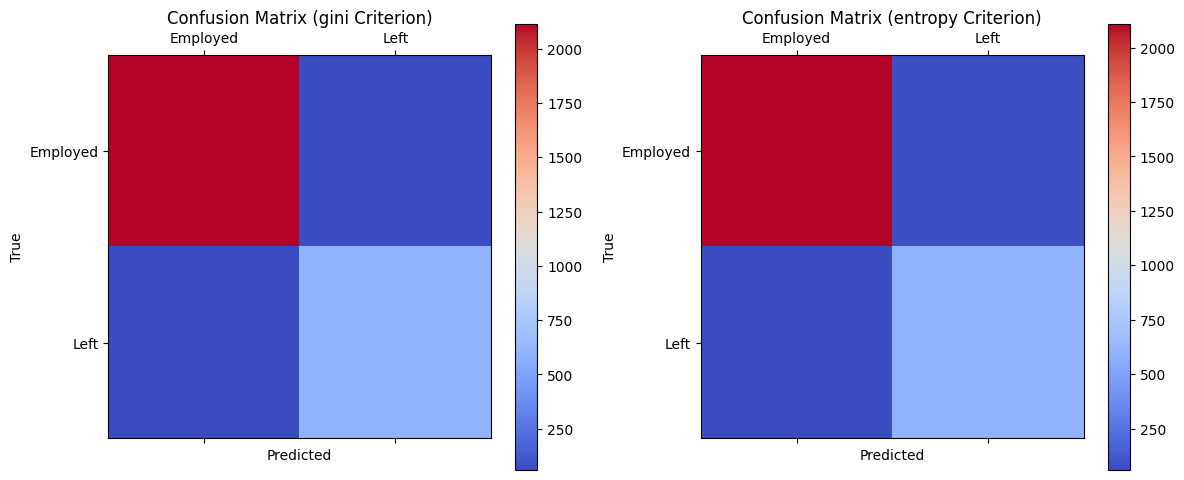

In [ ]:
# Create a diverging bar chart to display confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, criterion in enumerate(criteria):
    ax = axes[i]
    labels = ['Employed', 'Left']
    cmap = plt.get_cmap("coolwarm")
    im = ax.matshow(confusion_matrices[i], cmap=cmap)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix ({criterion} Criterion)')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

### Visualization


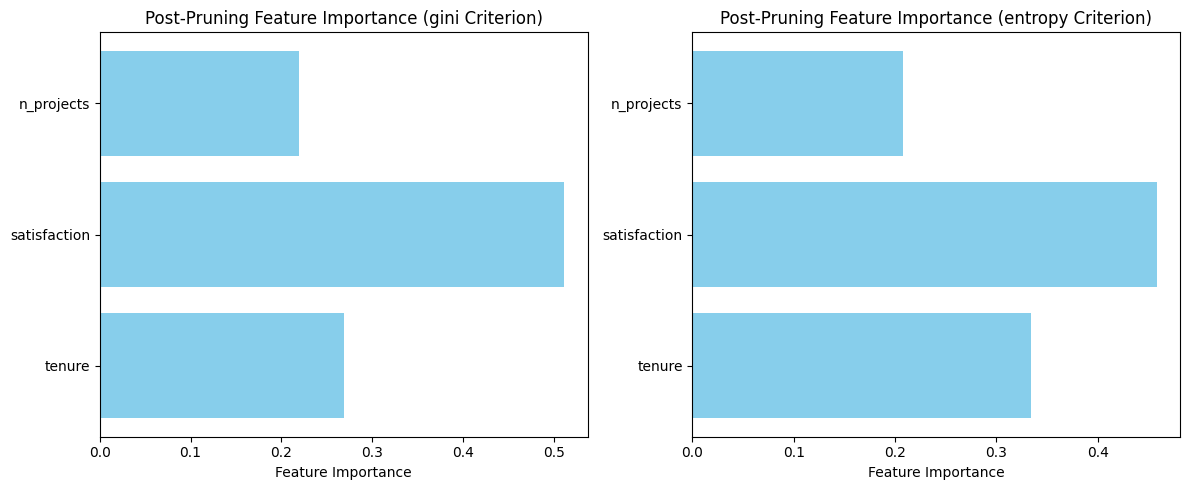

In [ ]:
# Initialize lists to store feature importances for Gini and Entropy criteria (post-pruning)
post_pruning_feature_importances = []

# Evaluate feature importance for both Gini impurity and entropy criteria (post-pruning)
for criterion in criteria:
    # Create a decision tree classifier with post-pruning
    post_pruning_clf = DecisionTreeClassifier(criterion=criterion, random_state=42, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

    # Train the classifier
    post_pruning_clf.fit(X_train, y_train)

    # Get feature importances
    post_pruning_importances = post_pruning_clf.feature_importances_
    post_pruning_feature_importances.append(post_pruning_importances)

# Create a bar chart to visualize feature importances for Gini and Entropy criteria (post-pruning)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
feature_labels = selected_features

for i, criterion in enumerate(criteria):
    ax = axes[i]
    ax.barh(feature_labels, post_pruning_feature_importances[i], color='skyblue')
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Post-Pruning Feature Importance ({criterion} Criterion)')

plt.tight_layout()
plt.show()


The plot shows that the most important feature for predicting employee status is employee satisfaction. This suggests that employees who are more satisfied with their jobs are more likely to stay with the company. Other important features include tenure and number of projects worked on. This suggests that more experienced employees who are working on more projects are more likely to stay with the company.



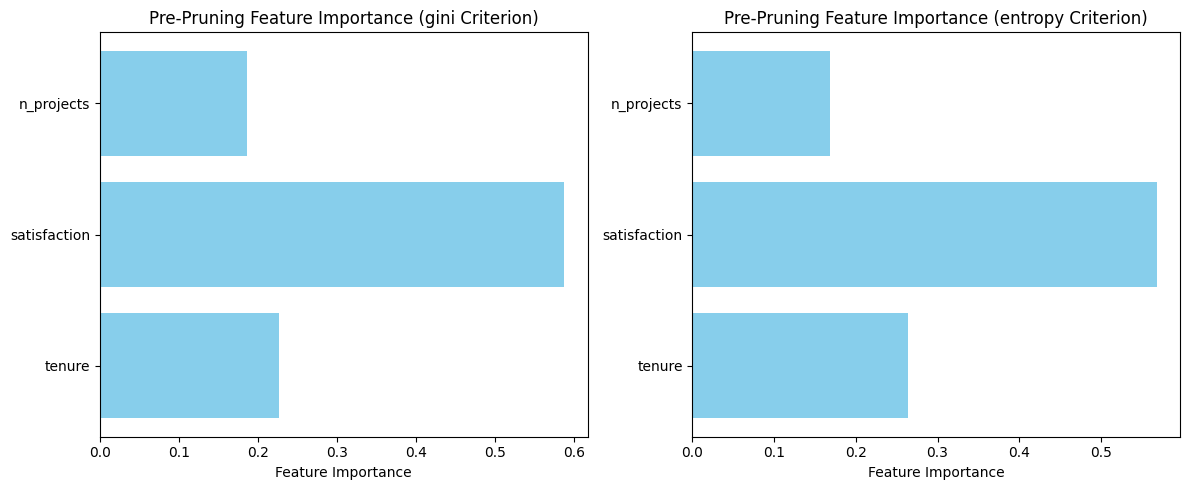

In [ ]:
# Initialize lists to store feature importances for Gini and Entropy criteria (pre-pruning)
pre_pruning_feature_importances = []

# Evaluate feature importance for both Gini impurity and entropy criteria (pre-pruning)
for criterion in criteria:
    # Create a decision tree classifier without post-pruning
    pre_pruning_clf = DecisionTreeClassifier(criterion=criterion, random_state=42)

    # Train the classifier
    pre_pruning_clf.fit(X_train, y_train)

    # Get feature importances
    pre_pruning_importances = pre_pruning_clf.feature_importances_
    pre_pruning_feature_importances.append(pre_pruning_importances)

# Create a bar chart to visualize feature importances for Gini and Entropy criteria (pre-pruning)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
feature_labels = selected_features

for i, criterion in enumerate(criteria):
    ax = axes[i]
    ax.barh(feature_labels, pre_pruning_feature_importances[i], color='skyblue')
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Pre-Pruning Feature Importance ({criterion} Criterion)')

plt.tight_layout()
plt.show()
